In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-influence-on-shopping/WhatsgoodlyData-6.csv


In [ ]:
df = pd.read_csv('/kaggle/input/social-influence-on-shopping/WhatsgoodlyData-6.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Question             1450 non-null   object 
 1   Segment Type         1450 non-null   object 
 2   Segment Description  1450 non-null   object 
 3   Answer               1160 non-null   object 
 4   Count                1450 non-null   int64  
 5   Percentage           1450 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 68.1+ KB


In [ ]:
df.head()

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,What social platform has influenced your onlin...,Mobile,Global results,Facebook,548,0.205
1,What social platform has influenced your onlin...,Mobile,Global results,Instagram,916,0.342
2,What social platform has influenced your onlin...,Mobile,Global results,Snapchat,86,0.032
3,What social platform has influenced your onlin...,Mobile,Global results,Twitter,179,0.067
4,What social platform has influenced your onlin...,Mobile,Global results,NaN,947,0.354


In [ ]:
df.Question.value_counts(normalize=True)

Question
What social platform has influenced your online shopping most?    1.0
Name: proportion, dtype: float64

In [ ]:
df.describe(include='all')

,Question,Segment Type,Segment Description,Answer,Count,Percentage
count,1450,1450,1450,1160,1450.000000,1450.000000
unique,1,5,289,4,NaN,NaN
top,What social platform has influenced your onlin...,University,What's your major? Other,Facebook,NaN,NaN
freq,1450,870,10,290,NaN,NaN
mean,NaN,NaN,NaN,NaN,35.013793,0.199313
std,NaN,NaN,NaN,NaN,95.055604,0.274989
min,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,1.000000,0.063500
75%,NaN,NaN,NaN,NaN,20.000000,0.323750


Facebook is the most frequent answer;290 times.
University is the most frequent 'Segment type'; 870 times.

In [ ]:
#Removing rows with no entry in Answer column.
df2 = df.dropna(subset=['Answer'])

In [ ]:
df2.isnull().sum()

Question               0
Segment Type           0
Segment Description    0
Answer                 0
Count                  0
Percentage             0
dtype: int64

In [ ]:
df2.groupby(['Segment Type','Answer'])['Count'].agg('sum')

Segment Type  Answer   
Custom        Facebook      8747
              Instagram    13964
              Snapchat      1335
              Twitter       2918
Gender        Facebook       548
              Instagram      915
              Snapchat        85
              Twitter        179
Mobile        Facebook       548
              Instagram      916
              Snapchat        86
              Twitter        179
University    Facebook       486
              Instagram      729
              Snapchat        68
              Twitter        131
Web           Facebook         0
              Instagram        0
              Snapchat         0
              Twitter          0
Name: Count, dtype: int64

In [ ]:
grouped = df2.groupby(['Segment Type','Answer'])['Count'].agg('sum')
seg = [i[0] for i in grouped.index]
ans = [i[1] for i in grouped.index]

<Axes: >

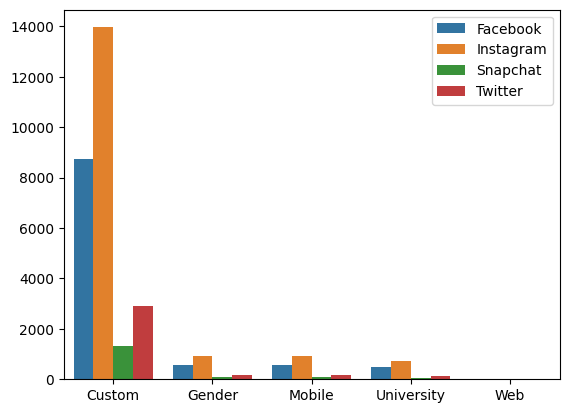

In [ ]:
sns.barplot(x=seg, y=grouped.values,hue=ans)

<Axes: >

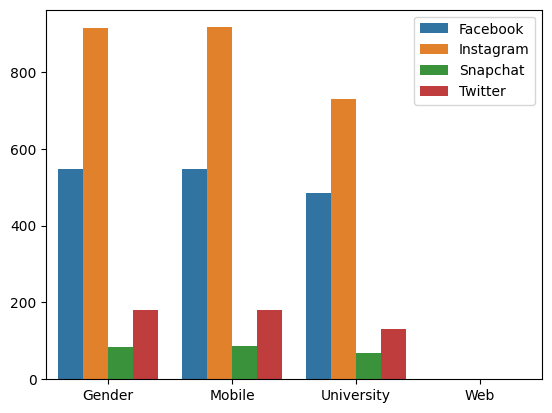

In [ ]:
seg1= [i for i in seg if i!='Custom']
ans1= [i[1] for i in grouped.index if i[0]!='Custom']
sns.barplot(x=seg1, y=grouped.iloc[4:].values,hue=ans1)

Instagram and Facebook have influenced online shopping behaviour the most.
Snapchat has the lowest influence on shopping behaviour.
Instagram has a significantly high influence on shopping behaviour.

/tmp/ipykernel_43/362780531.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Answer',y='Count',palette=['red','grey','grey','blue'],order=df2.groupby('Answer')['Count'].agg('mean').sort_values(ascending=False).index,data=df2, ci=None)


Text(0, 0.5, 'Average Count')

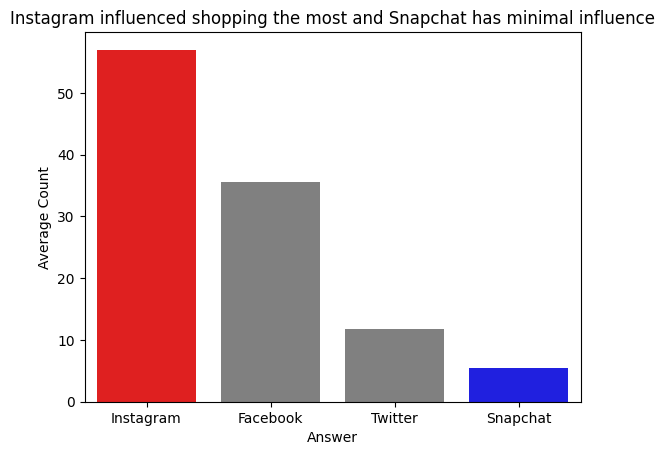

In [ ]:
sns.barplot(x='Answer',y='Count',palette=['red','grey','grey','blue'],order=df2.groupby('Answer')['Count'].agg('mean').sort_values(ascending=False).index,data=df2, ci=None)
plt.title('Instagram influenced shopping the most and Snapchat has minimal influence')
plt.ylabel('Average Count')

In [ ]:
seg1

['Gender',
 'Gender',
 'Gender',
 'Gender',
 'Mobile',
 'Mobile',
 'Mobile',
 'Mobile',
 'University',
 'University',
 'University',
 'University',
 'Web',
 'Web',
 'Web',
 'Web']

In [ ]:
grouped.iloc[4:]

Segment Type  Answer   
Gender        Facebook     548
              Instagram    915
              Snapchat      85
              Twitter      179
Mobile        Facebook     548
              Instagram    916
              Snapchat      86
              Twitter      179
University    Facebook     486
              Instagram    729
              Snapchat      68
              Twitter      131
Web           Facebook       0
              Instagram      0
              Snapchat       0
              Twitter        0
Name: Count, dtype: int64

In [ ]:
ans1

['Facebook',
 'Instagram',
 'Snapchat',
 'Twitter',
 'Facebook',
 'Instagram',
 'Snapchat',
 'Twitter',
 'Facebook',
 'Instagram',
 'Snapchat',
 'Twitter',
 'Facebook',
 'Instagram',
 'Snapchat',
 'Twitter']